In [2]:
import kfood_dataset
import tensorflow as tf
paths = kfood_dataset.get_image_paths()

dataset path : /Users/hwijin/Desktop/Code/ml/KFood/kfood True
saving classes, labels...
saving crop information...
ready!Metal device set to: 
finding image paths...
Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-01-31 16:46:15.918223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-31 16:46:15.918348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


shuffling...
paths ready!


In [31]:
valid_set = kfood_dataset.make_kfood_dataset(paths[20000:30000])
train_set = kfood_dataset.make_kfood_dataset(paths[30000:])
test_set = kfood_dataset.make_kfood_dataset(paths[:20000])

2022-01-31 16:46:17.167866: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-31 16:46:17.170602: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor([[38]], shape=(1, 1), dtype=int64)
tf.Tensor([[32]], shape=(1, 1), dtype=int64)
tf.Tensor([[84]], shape=(1, 1), dtype=int64)
tf.Tensor([[95]], shape=(1, 1), dtype=int64)
tf.Tensor([[36]], shape=(1, 1), dtype=int64)
tf.Tensor([[131]], shape=(1, 1), dtype=int64)
tf.Tensor([[100]], shape=(1, 1), dtype=int64)
tf.Tensor([[93]], shape=(1, 1), dtype=int64)


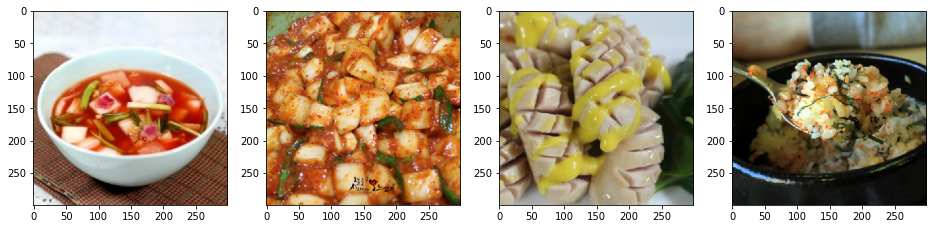

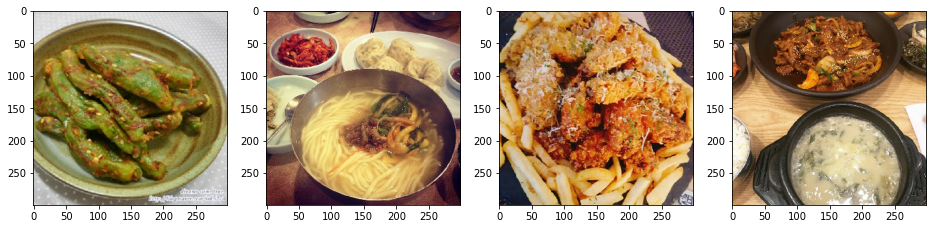

In [4]:
kfood_dataset.plot_dataset_image_4(train_set)
kfood_dataset.plot_dataset_image_4(test_set)

In [32]:
import tensorflow as tf
from tensorflow import keras


In [8]:
pretrain_model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=[299,299,3])
pretrain_model.summary()

219070464/219055592 [==============================] - 90s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_152 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 149, 149, 32) 96          conv2d_152[0][0]                 
__________________________________________________________________________________________________
activation_132 (Activation)     (None, 149, 149, 32) 0           batch_normalization_132[0][0]    
____________

In [33]:
for layer in pretrain_model.layers:
    layer.trainable = False

avg = keras.layers.GlobalAveragePooling2D()(pretrain_model.output)
output = keras.layers.Dense(150, activation="softmax")(avg)
model = keras.models.Model(inputs=pretrain_model.input, outputs=output)


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [42]:
model.fit(train_set, 
        steps_per_epoch=len(paths[30000:]) // 32 // 10, 
        validation_data=valid_set, 
        validation_steps=len(paths[20000:30000]) // 32 // 10,
        epochs=1)

  7/376 [..............................] - ETA: 3:02 - loss: 4.4893 - accuracy: 0.0446

2022-01-31 17:08:55.911474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/376 [==>...........................] - ETA: 2:43 - loss: 4.2684 - accuracy: 0.1090

2022-01-31 17:09:12.434250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/376 [======>.......................] - ETA: 2:18 - loss: 3.9535 - accuracy: 0.1518

2022-01-31 17:09:36.544683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/376 [======>.......................] - ETA: 2:16 - loss: 3.9312 - accuracy: 0.1546

2022-01-31 17:09:38.498819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/376 [========>.....................] - ETA: 2:04 - loss: 3.8293 - accuracy: 0.1661

Invalid SOS parameters for sequential JPEG


148/376 [==========>...................] - ETA: 1:51 - loss: 3.7179 - accuracy: 0.1810

2022-01-31 17:10:04.656630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/376 [============>.................] - ETA: 1:41 - loss: 3.6376 - accuracy: 0.1934

2022-01-31 17:10:15.139975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/376 [=============>................] - ETA: 1:37 - loss: 3.6204 - accuracy: 0.1957

2022-01-31 17:10:18.546352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/376 [==============>...............] - ETA: 1:30 - loss: 3.5739 - accuracy: 0.2030

2022-01-31 17:10:25.808650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


261/376 [===================>..........] - ETA: 56s - loss: 3.3899 - accuracy: 0.2329

2022-01-31 17:11:00.308999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/376 [=====================>........] - ETA: 45s - loss: 3.3330 - accuracy: 0.2432

Invalid SOS parameters for sequential JPEG


376/376 [==============================] - ETA: 0s - loss: 3.1567 - accuracy: 0.2732

2022-01-31 17:11:58.730070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-31 17:12:00.451564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/376 [==============================] - 203s 538ms/step - loss: 3.1567 - accuracy: 0.2732 - val_loss: 2.5852 - val_accuracy: 0.3569


In [5]:
inputs = keras.layers.Input(shape=[299, 299, 3])
inception_output = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights=None)
z = keras.layers.GlobalAvgPool2D()(inception_output)
outputs = keras.layers.Dense(150, activation='softmax')(z)

model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               230550    
Total params: 54,567,286
Trainable params: 54,506,742
Non-trainable params: 60,544
_________________________________________________________________


In [6]:
import datetime
import os

now = datetime.datetime.now()
#model_name = 'InceptionResNetV2'
#model_paths = 'drive/MyDrive/Model/kfood/{}/'.format(model_name)
#if not os.path.exists(model_paths):
    #os.mkdir(model_paths)


class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        fileformats = [now.year, now.month, now.day, now.hour, now.minute, epoch]
#        self.model.save(model_paths + "{}_{}_{}_{}_{}_{}.hd5".format(*fileformats))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
history = model.fit(train_set, epochs=1, steps_per_epoch=500)

2022-01-26 16:23:48.775152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 33/500 [>.............................] - ETA: 12:49 - loss: 5.2516 - accuracy: 0.0123

KeyboardInterrupt: 